## 非线性数据回归测试

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
train_samples = 200
test_samples = 60
total_samples = train_samples + test_samples
epochs = 100

In [4]:
def model(X, hidden_weights, hidden_bias, ow):
    Z = X @ hidden_weights + hidden_bias
    A = tf.nn.sigmoid(Z)
    return A @ ow

In [8]:
dsX = np.linspace(-1, 1, total_samples).reshape(-1, 1)
dsY = 0.4 * np.power(dsX, 2) + 2 * dsX + 0.8 + np.random.randn(*dsX.shape) * 0.22

dsX, dsY = shuffle(dsX, dsY)

trainX, trainY = dsX[: train_samples, :], dsY[: train_samples, :]
testX, testY = dsX[train_samples: total_samples, :], dsY[train_samples: total_samples, :]

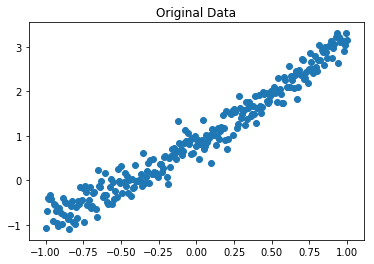

In [6]:
plt.figure()
plt.title("Original Data")
plt.scatter(dsX, dsY)
plt.show()

In [11]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=[None, 1])
Y = tf.placeholder(dtype=tf.float32, shape=[None, 1])

hw1 = tf.Variable(tf.random_normal(shape=[1, 10], dtype=tf.float32))
b = tf.Variable(tf.random_normal(shape=[1, 10], dtype=tf.float32))
ow = tf.Variable(tf.random_normal(shape=[10, 1]), dtype=tf.float32)

Y_ = model(X, hw1, b, ow)
cost = tf.reduce_mean(tf.pow(Y_ - Y, 2), axis=0)

train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost)
init = tf.global_variables_initializer()

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

sess.run(init)
for epoch in range(epochs):
    trainX, trainY = shuffle(trainX, trainY)
    for x1, y1 in zip(trainX, trainY):
        sess.run(train_op, feed_dict={X: x1.reshape(1, 1), Y: y1.reshape(1, 1)})
    cost_ = sess.run(cost, feed_dict={X: testX, Y: testY})
    if epoch % 10 == 0 or epoch == epochs - 1:
        print("epoch: %d, test_mse: %.4f" % (epoch, cost_))

sess.close()

epoch: 0, test_mse: 0.0784
epoch: 10, test_mse: 0.0459
epoch: 20, test_mse: 0.0414
epoch: 30, test_mse: 0.0476
epoch: 40, test_mse: 0.0429
epoch: 50, test_mse: 0.0517
epoch: 60, test_mse: 0.0459
epoch: 70, test_mse: 0.0478
epoch: 80, test_mse: 0.0440
epoch: 90, test_mse: 0.0449
epoch: 99, test_mse: 0.0458


## 非线性回归预测汽车燃烧效率

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow.contrib.learn as skflow
path = "F:/for learn/Python/Building-Machine-Learning-Projects-with-TensorFlow-master/5/data/"

In [10]:
df = pd.read_csv(path + "mpg.csv")
feature_columns = ["cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]

X = df[feature_columns]
y = df["mpg"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [7]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [9]:
opt = tf.train.GradientDescentOptimizer(0.051)

In [14]:
feature_cols = [tf.contrib.layers.real_valued_column(k) for k in feature_columns]
model_dir = "C:/Users/Cigar/Documents/jupyter/Tensorflow_learn/Build ML Projects with TF/Chap05_save/"

In [15]:
regressor = skflow.DNNRegressor(hidden_units=[10, 5], 
                                feature_columns=feature_cols, 
                                model_dir=model_dir)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000023CD1C5BA90>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:/Users/Cigar/Documents/jupyter/Tensorflow_learn/Build ML Projects with TF/Chap05_save/'}
